## Algemeen, data inladen

In [1]:
import pandas as pd
import datetime
from configparser import ConfigParser
import json, requests
from pysimplicate import Simplicate

# Simplicate
ini = ConfigParser()
ini.read('../credentials.ini')

subdomain = ini['simplicate']['subdomain']
api_key = ini['simplicate']['api_key']
api_secret = ini['simplicate']['api_secret']

sim = Simplicate(subdomain, api_key, api_secret )

# Hours file in Pandas format
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('display.max_columns', 500)
PANDAS_FILE = '../simplicate_cache/hours.pd'
df = pd.read_pickle(PANDAS_FILE)

pd.options.display.float_format = '{:,.1f}'.format
#df['turnover'] = df.apply(lambda a: (a['hours']+a['corrections']) * (a['tariff'] if a['tariff'] > 0 else a['service_tariff']), axis=1)
#df['turnover'] = df.apply(lambda a: 0 if a['project_number'] == 'TOR-3'  and a['service'] == 'Development Sprints Q1' else a['turnover'], axis=1)
#df['week'] = df.apply(lambda a: datetime.datetime.strptime(a['day'],'%Y-%m-%d').isocalendar()[1], axis=1)
df[-20:]
df.query("service=='Doorontwikkeling Q3 - augustus' and employee=='Jordi Hendrix'")

,hours_id,employee,organization,project_id,project_name,project_number,service,service_id,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week,corrections_value
22073,hours:7e7e5bec5298eb473394b6f1f9ed2b55,Jordi Hendrix,Travelbase,project:ec5dcafc7bb12e2bfeaad60b7a7437df,Travelbase Oberon Doorontwikkeling Q3 2021,TRAV-9,Doorontwikkeling Q3 - augustus,service:e816209febe277b3b61e8ec4cf9407af,normal,95.0,Development,False,112.5,7.5,2021-08-03,projectmanager_approved,0.0,843.8,31,0.0
22386,hours:7e7e5bec5298eb472c7cd662ba297dfb,Jordi Hendrix,Travelbase,project:ec5dcafc7bb12e2bfeaad60b7a7437df,Travelbase Oberon Doorontwikkeling Q3 2021,TRAV-9,Doorontwikkeling Q3 - augustus,service:e816209febe277b3b61e8ec4cf9407af,normal,95.0,Development,False,112.5,7.5,2021-08-05,projectmanager_approved,0.0,843.8,31,0.0
22540,hours:abad15e4aa4feec4e4f899cd1ce75a6b,Jordi Hendrix,Travelbase,project:ec5dcafc7bb12e2bfeaad60b7a7437df,Travelbase Oberon Doorontwikkeling Q3 2021,TRAV-9,Doorontwikkeling Q3 - augustus,service:e816209febe277b3b61e8ec4cf9407af,normal,95.0,Development,False,112.5,4.0,2021-08-06,projectmanager_approved,0.0,450.0,31,0.0
22657,hours:abad15e4aa4feec41849b862a5c43463,Jordi Hendrix,Travelbase,project:ec5dcafc7bb12e2bfeaad60b7a7437df,Travelbase Oberon Doorontwikkeling Q3 2021,TRAV-9,Doorontwikkeling Q3 - augustus,service:e816209febe277b3b61e8ec4cf9407af,normal,95.0,Development,False,112.5,8.0,2021-08-09,projectmanager_approved,0.0,900.0,32,0.0
22818,hours:abad15e4aa4feec48eba91d06fcc384e,Jordi Hendrix,Travelbase,project:ec5dcafc7bb12e2bfeaad60b7a7437df,Travelbase Oberon Doorontwikkeling Q3 2021,TRAV-9,Doorontwikkeling Q3 - augustus,service:e816209febe277b3b61e8ec4cf9407af,normal,95.0,Development,False,112.5,2.5,2021-08-10,projectmanager_approved,0.0,281.2,32,0.0
23066,hours:abad15e4aa4feec4a3ea4a7fc6c2c853,Jordi Hendrix,Travelbase,project:ec5dcafc7bb12e2bfeaad60b7a7437df,Travelbase Oberon Doorontwikkeling Q3 2021,TRAV-9,Doorontwikkeling Q3 - augustus,service:e816209febe277b3b61e8ec4cf9407af,normal,95.0,Development,False,112.5,7.8,2021-08-12,projectmanager_approved,0.0,871.9,32,0.0
23195,hours:abad15e4aa4feec405da2d376bbf8e88,Jordi Hendrix,Travelbase,project:ec5dcafc7bb12e2bfeaad60b7a7437df,Travelbase Oberon Doorontwikkeling Q3 2021,TRAV-9,Doorontwikkeling Q3 - augustus,service:e816209febe277b3b61e8ec4cf9407af,normal,95.0,Development,False,112.5,7.5,2021-08-13,projectmanager_approved,0.0,843.8,32,0.0
23850,hours:7c2c40e18f635af06989e60c42b7b671,Jordi Hendrix,Travelbase,project:ec5dcafc7bb12e2bfeaad60b7a7437df,Travelbase Oberon Doorontwikkeling Q3 2021,TRAV-9,Doorontwikkeling Q3 - augustus,service:e816209febe277b3b61e8ec4cf9407af,normal,95.0,Development,False,112.5,7.0,2021-08-20,projectmanager_approved,0.0,787.5,33,0.0
23980,hours:7c2c40e18f635af03ed1f919b1b63272,Jordi Hendrix,Travelbase,project:ec5dcafc7bb12e2bfeaad60b7a7437df,Travelbase Oberon Doorontwikkeling Q3 2021,TRAV-9,Doorontwikkeling Q3 - augustus,service:e816209febe277b3b61e8ec4cf9407af,normal,95.0,Development,False,112.5,2.5,2021-08-23,projectmanager_approved,0.0,281.2,34,0.0
24372,hours:38e5b3ace10c13eaf0d96f53d03c15e2,Jordi Hendrix,Travelbase,project:ec5dcafc7bb12e2bfeaad60b7a7437df,Travelbase Oberon Doorontwikkeling Q3 2021,TRAV-9,Doorontwikkeling Q3 - augustus,service:e816209febe277b3b61e8ec4cf9407af,normal,95.0,Development,False,112.5,6.5,2021-08-26,projectmanager_approved,0.0,731.2,34,0.0


In [2]:
df['turnover'].sum()

2870562.0500000077

In [3]:
tor = df.query('project_number == "TOR-3"')     
tor.groupby(['service'])[['hours','turnover']].sum()

,hours,turnover
service,,
Development Sprint Q3,575.1,0.0
Development Sprint Q3 - fase 1,334.2,0.0
Development Sprints Q1&Q2,"3,171.8",0.0
Ontwikkeling introductie film Travelbase,10.0,0.0
TOR 3.0 Fase 2 Ameland 2021,31.8,"2,801.9"
TOR 3.0 Fase 2 Schiermonnikoog 2021,21.2,"1,900.6"
TOR 3.0 Fase 2 Texel 2021,80.2,"8,013.8"
TOR 3.0 fase 2,18.0,"1,395.0"


In [4]:
tor.query('service != "Development Sprints Q1"')

,hours_id,employee,organization,project_id,project_name,project_number,service,service_id,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week,corrections_value
84,hours:7ed4ca826c3d49d5e951103a6518d11e,Kelly de Haan,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprints Q1&Q2,service:00a585589a41caf6d8107a68a60f150e,normal,95.0,Back-end Development,False,0.0,0.0,2021-01-04,forwarded,0.0,0.0,1,0.0
85,hours:a096f99525269333d0c742be6ab28b35,Jochem Tijhuis,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprints Q1&Q2,service:00a585589a41caf6d8107a68a60f150e,normal,95.0,Back-end Development,False,0.0,0.0,2021-01-04,forwarded,0.0,0.0,1,0.0
221,hours:8cc4b2ff2cefa2108189ff8d03ee348e,Richard de Boer,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprints Q1&Q2,service:00a585589a41caf6d8107a68a60f150e,normal,110.0,Project Management,False,110.0,1.0,2021-01-05,projectmanager_approved,0.0,0.0,1,0.0
222,hours:7ed4ca826c3d49d5b63f40e641d7ba67,Eva Korteweg,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprints Q1&Q2,service:00a585589a41caf6d8107a68a60f150e,normal,110.0,Project Management,False,85.0,3.0,2021-01-05,projectmanager_approved,0.0,0.0,1,0.0
225,hours:7fb58792ec308c6cdf7a562c526e073a,Richard van Willegen,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprints Q1&Q2,service:00a585589a41caf6d8107a68a60f150e,normal,95.0,Front-end Development,False,0.0,0.0,2021-01-05,forwarded,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34671,hours:a1772529979777ff985df911d87f5956,Jordi Hendrix,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprint Q3,service:7eea09b579ba1869d250481ad7cc455b,normal,95.0,Development,True,112.5,1.0,2021-12-03,forwarded,0.0,0.0,48,0.0
34672,hours:a1772529979777ff95150f42085f058c,Jordi Hendrix,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprint Q3,service:7eea09b579ba1869d250481ad7cc455b,normal,95.0,Development,True,112.5,1.2,2021-12-03,forwarded,0.0,0.0,48,0.0
34673,hours:a1772529979777ff6de6c25c3ce54bae,Jordi Hendrix,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprint Q3,service:7eea09b579ba1869d250481ad7cc455b,normal,95.0,Development,True,112.5,0.2,2021-12-03,forwarded,0.0,0.0,48,0.0
34677,hours:a1772529979777ffc6fe4db60ba066ed,Jordi Hendrix,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprint Q3,service:7eea09b579ba1869d250481ad7cc455b,normal,95.0,Development,True,112.5,3.5,2021-12-03,forwarded,0.0,0.0,48,0.0


## Focus op gewerkte uren, laat vrij/ziek eruit

In [5]:
# type can be 'normal', 'absence' or 'leave'
worked = df.query( 'type=="normal" ')
worked.describe()

,service_tariff,tariff,hours,corrections,turnover,corrections_value
count,"33,252.0","33,252.0","33,252.0","33,252.0","33,252.0","33,252.0"
mean,44.9,39.3,1.9,-0.1,86.3,-10.2
std,50.4,57.0,2.3,0.7,193.1,74.7
min,0.0,0.0,0.0,-9.0,-0.0,"-6,000.0"
25%,0.0,0.0,0.5,0.0,0.0,0.0
50%,0.0,0.0,1.0,0.0,0.0,0.0
75%,95.0,85.0,2.5,0.0,55.0,0.0
max,140.0,"6,000.0",18.0,4.0,"1,147.5",340.0


## Overzicht per dag/week

In [6]:
worked.groupby(['week','day'])[['hours','turnover']].sum()

hours  turnover
week day                        
1    2021-01-04  305.2   3,562.5
     2021-01-05  336.2  14,101.5
     2021-01-06  294.2  13,795.7
     2021-01-07  299.2  11,780.7
     2021-01-08  241.8  12,805.6
...                ...       ...
48   2021-12-04    0.0       0.0
     2021-12-05    2.5       0.0
53   2021-01-01    0.0       0.0
     2021-01-02    2.0      42.5
     2021-01-03    2.5       0.0

[331 rows x 2 columns]

In [7]:
worked.groupby(['week'])[['hours','turnover']].sum()

,hours,turnover
week,,
1,"1,481.3","56,088.4"
2,"1,582.5","65,612.4"
3,"1,553.5","55,939.1"
4,"1,525.5","62,577.6"
5,"1,580.2","52,378.8"
6,"1,459.1","63,160.3"
7,"1,630.5","63,064.9"
8,"1,512.0","65,061.1"
9,"1,649.0","67,610.4"


## Per persoon

In [8]:
teamview = pd.DataFrame( worked )
team = sorted([str(t) for t in teamview.employee.unique()])
for t in team:
    teamview[t] = teamview.apply(lambda a: a['turnover'] if a['employee'] == t else 0, axis=1)
cols= ['hours','turnover'] + team
pppw = teamview.groupby(['week'])[cols].sum().query('turnover > 0').T
pppw = pppw.drop( ['hours','turnover','Freelancer','Hans-Peter Harmsen', 'Gert Braun', 'Richard de Boer', 
                   'Joost Cornelissen', 'Jasper Bok', 'Mel Schuurman', 'Martijn van Klaveren', 
                   'Angela Duijs', 'Lunah Smits','Michiel Willekens', 'Wouter Gerrits'])
pppw.loc['mean'] = pppw.mean()
cols = ['week'+str(col) for col in pppw.columns]
pppw.columns = cols
maxVal = 3000
for col in cols:
    pppw[col] = pppw[col].where(pppw[col] < maxVal, maxVal)
pppw

,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week13,week14,week15,week16,week17,week18,week19,week20,week21,week22,week23,week24,week25,week26,week27,week28,week29,week30,week31,week32,week33,week34,week35,week36,week37,week38,week39,week40,week41,week42,week43,week44,week45,week46,week47,week48,week53
Bas Colenbrander,680.0,640.0,"1,340.0","2,315.0",170.0,"1,077.5",440.0,"2,616.2",981.2,445.0,"1,283.8","1,510.0",380.0,400.0,0.0,"1,748.8",385.0,55.0,0.0,0.0,0.0,80.0,0.0,0.0,"2,040.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caspar Geerlings,435.0,"1,159.5","1,030.0",511.8,"1,069.5",972.2,735.0,717.5,769.2,"1,642.5","1,080.0",947.5,"1,731.8",842.0,"1,172.0",630.0,308.0,721.5,279.8,654.5,537.0,"1,445.0",771.5,850.5,406.0,624.8,577.5,848.2,460.5,507.0,623.2,0.0,0.0,0.0,693.0,748.2,609.5,"1,495.8",682.2,787.5,941.0,481.5,589.8,"1,011.5",0.0,909.2,973.5,49.5,0.0
Chris Neven,"2,125.0","3,000.0",212.5,0.0,310.0,340.0,310.0,0.0,523.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"1,180.0","1,280.0","1,000.0",640.0,0.0,380.0,"1,600.0","2,795.0",0.0,0.0,0.0,918.8,"1,881.2",0.0,0.0,"1,903.1",656.2,"1,771.9","2,333.3",721.9,393.8,"1,137.5","1,968.8","1,881.2","2,756.2","2,800.0","2,712.5","2,800.0","2,646.9",0.0
Eva Korteweg,482.5,530.0,"1,070.0",587.5,183.8,200.0,383.8,585.0,503.8,42.5,783.8,"1,160.0",666.2,720.0,"1,085.0",942.5,840.0,"1,362.5","1,920.0","1,230.0","1,135.0","1,077.5","1,690.0",527.5,"1,245.0","1,498.8","1,917.5","1,059.4",672.5,"1,028.1",896.9,700.0,0.0,0.0,0.0,284.4,371.9,481.2,705.0,553.1,746.2,196.9,350.0,568.8,831.2,853.1,"1,312.5","1,050.0",0.0
Ewout Thieme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,"3,000.0","3,000.0","3,000.0",0.0,0.0
Fadhlur Zahri,"1,064.2",492.7,778.5,"1,787.5","1,536.5","1,685.8","1,180.0","1,097.5","2,271.8","2,411.0","2,471.5","1,132.9",982.7,632.3,"1,153.5","1,265.0",715.0,"1,113.8","1,267.5",82.5,777.5,"1,974.7","1,979.4","1,782.0",899.3,"2,220.0","1,422.5","1,410.0","1,337.5","1,626.7","1,570.9","1,494.0","1,380.0","1,882.5","1,804.2","1,386.0","1,554.8","2,010.3","1,425.0",989.2,"1,872.5","1,159.0","1,912.5","2,141.8","1,528.5","2,407.5","2,933.7","1,359.9",0.0
Filipe José Mariano dos Santos,"2,720.0","2,260.0","2,305.0","2,720.0","2,550.0",680.0,"2,897.5","3,000.0","2,885.0","3,000.0","2,545.0","2,545.0",680.0,"1,710.0","1,120.0","2,640.0","1,997.5","2,360.0","1,912.5","3,000.0","2,725.0","3,000.0","3,000.0","3,000.0","2,520.0",0.0,"2,577.5","3,000.0","2,577.5","2,563.8","2,805.0",0.0,"2,550.0","2,930.0","2,550.0","3,000.0","3,000.0","3,000.0","3,000.0","3,000.0","2,981.2",900.0,"2,260.0","3,000.0","3,000.0","2,868.8","3,000.0",0.0,0.0
Fleur van Eijk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Geert-Jan van Mastrigt,"2,115.0","2,040.0","1,848.8","1,912.5","1,275.0","2,152.5","1,912.5",886.2,"1,810.0","1,615.0","1,572.5",0.0,0.0,"1,700.0","1,845.0","1,460.0","1,190.0","1,360.0",765.0,"1,700.0","1,147.5","1,700.0","1,487.5","1,317.5",340.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
George Tsimenis,"3,000.0","3,000.0","3,000.0","2,970.0",440.0,"3,000.0","2,060.0","2,205.0","2,350.0","3,000.0","2,200.0","3,000.0",0.0,"2,080.0","1,615.0","2,422.5","2,380.0","3,000.0","1,535.0","2,422.5","2,295.0","2,500.0","1,965.0","2,030.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
[str(col) for col in pppw.columns]

['week1',
 'week2',
 'week3',
 'week4',
 'week5',
 'week6',
 'week7',
 'week8',
 'week9',
 'week10',
 'week11',
 'week12',
 'week13',
 'week14',
 'week15',
 'week16',
 'week17',
 'week18',
 'week19',
 'week20',
 'week21',
 'week22',
 'week23',
 'week24',
 'week25',
 'week26',
 'week27',
 'week28',
 'week29',
 'week30',
 'week31',
 'week32',
 'week33',
 'week34',
 'week35',
 'week36',
 'week37',
 'week38',
 'week39',
 'week40',
 'week41',
 'week42',
 'week43',
 'week44',
 'week45',
 'week46',
 'week47',
 'week48',
 'week53']

In [10]:
!pip install matplotlib

You should consider upgrading via the '/Users/hp/proj/dashboard/venv/bin/python -m pip install --upgrade pip' command.


In [11]:
%matplotlib inline


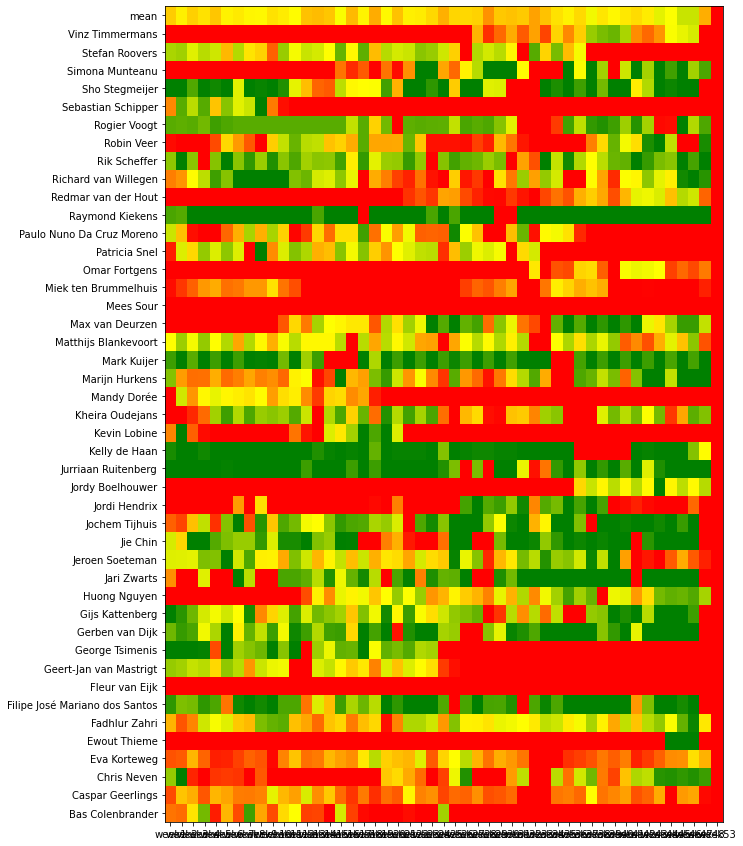

In [12]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['figure.figsize'] = [10, 15]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.pcolor(pppw, cmap=cmap)
plt.yticks(np.arange(0.5, len(pppw.index), 1), pppw.index)
plt.xticks(np.arange(0.5, len(pppw.columns), 1), pppw.columns)
#plt.set_size(500,800)
plt.show()

## Specifics
### Werk door een medewerker in een week

In [28]:
def person_week( employee, week ):
    filtered = df.query( f'employee == "{employee}" and week=={week}' )
    print( filtered.groupby(['week','day','project_name'])[['hours','corrections','turnover']].sum())
    totals = filtered[['hours','corrections','turnover']].sum()
    print( f'Totals {int(totals[0])}, €{int(totals[2])}')    
    
    
person_week( 'Jordi Hendrix', 41)    

                                       hours  corrections  turnover
week day        project_name                                       
41   2021-10-11 Internal                 7.5          0.0       0.0
                Platform                 0.5          0.0       0.0
     2021-10-12 Platform                 8.2          0.0       0.0
     2021-10-14 Doorontwikkeling 2021    0.8          0.0      71.2
                Internal                 0.5          0.0       0.0
                Platform                 6.8          0.0       0.0
     2021-10-15 Platform                 8.0          0.0       0.0
Totals 32, €71


In [14]:
df.query( f'employee ==  "Jordi Hendrix" and week==2' )

,hours_id,employee,organization,project_id,project_name,project_number,service,service_id,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week,corrections_value
744,hours:5bd1ad929877fc537e40e72f8278f709,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,service:6e599f61f95cd84dd250481ad7cc455b,normal,0.0,Internal,False,0.0,1.0,2021-01-11,projectmanager_approved,0.0,0.0,2,0.0
784,hours:5bd1ad929877fc530fb1ab308301e8de,Jordi Hendrix,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprints Q1&Q2,service:00a585589a41caf6d8107a68a60f150e,normal,95.0,Back-end Development,False,95.0,7.0,2021-01-11,projectmanager_approved,0.0,0.0,2,0.0
914,hours:5bd1ad929877fc53f0da59498c2637d3,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,service:6e599f61f95cd84dd250481ad7cc455b,normal,0.0,Internal,False,0.0,0.0,2021-01-12,forwarded,0.0,0.0,2,0.0
952,hours:5bd1ad929877fc538d4a32033575ba99,Jordi Hendrix,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprints Q1&Q2,service:00a585589a41caf6d8107a68a60f150e,normal,95.0,Back-end Development,False,95.0,8.0,2021-01-12,projectmanager_approved,0.0,0.0,2,0.0
1251,hours:fe10bc1e6638805fe5811c9f0aa3636b,Jordi Hendrix,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprints Q1&Q2,service:00a585589a41caf6d8107a68a60f150e,normal,95.0,Back-end Development,False,95.0,8.0,2021-01-14,projectmanager_approved,0.0,0.0,2,0.0
1374,hours:fe10bc1e6638805f68f536764e30df1e,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,Other / Unaccountable,service:a2ccfc1c8f9eb6d6d8107a68a60f150e,normal,0.0,Internal,False,0.0,0.0,2021-01-15,forwarded,0.0,0.0,2,0.0
1375,hours:fe10bc1e6638805fad09a49b8f6ffc1b,Jordi Hendrix,Oberon,project:21ea648f0c0c31fcfeaad60b7a7437df,Internal,OBE-1,ObSessions - Improve Oberon,service:6e599f61f95cd84dd250481ad7cc455b,normal,0.0,Internal,False,0.0,0.5,2021-01-15,projectmanager_approved,0.0,0.0,2,0.0
1403,hours:fe10bc1e6638805f084b8e905f9717a0,Jordi Hendrix,Travelbase,project:5fdd3f799c981c6dfeaad60b7a7437df,Platform,TOR-3,Development Sprints Q1&Q2,service:00a585589a41caf6d8107a68a60f150e,normal,95.0,Back-end Development,False,95.0,7.5,2021-01-15,projectmanager_approved,0.0,0.0,2,0.0


In [15]:
person_week( 'Filipe José Mariano dos Santos', 4)

                                   hours  corrections  turnover
week day        project_name                                   
4    2021-01-25 CopyCoin M&S 2021    7.0          0.0     595.0
                Internal             1.0          0.0       0.0
     2021-01-26 CopyCoin M&S 2021    2.5          0.0     212.5
                Internal             5.5          0.0       0.0
     2021-01-27 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
     2021-01-28 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
     2021-01-29 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
Totals 40, €2720


In [16]:
person_week( 'Jordi Hendrix', 4)

                              hours  corrections  turnover
week day        project_name                              
4    2021-01-25 Internal        1.0          0.0       0.0
                Platform        7.0         -7.0       0.0
     2021-01-26 Internal        0.5          0.0       0.0
                Platform        7.8         -7.8       0.0
     2021-01-28 Internal        0.5          0.0       0.0
                Platform        7.0         -7.0       0.0
     2021-01-29 Internal        0.5          0.0       0.0
                Platform        7.0         -7.0       0.0
Totals 31, €0


## Werk van een specifieke persoon

In [31]:
def person( employee ):
    filtered = df.query( f'employee == "{employee}"' )
    print( filtered.groupby(['project_name','project_number','service'])[['hours','corrections','turnover']].sum())
    totals = filtered[['hours','corrections','turnover']].sum()
    print( f'Totals {int(totals[0])}, €{int(totals[2])}')    
    
person( 'Jordi Hendrix')   

                                                                                               hours  \
project_name                               project_number service                                      
Design fases                               EASY-2         Software architectuur                  1.5   
Doorontwikkeling 2021                      IDFA-4         Festivalrelease 2021 Deel 1            7.2   
                                                          Festivalrelease 2021 Deel 2            2.8   
Internal                                   OBE-1          DevOps & Servers                       6.8   
                                                          ObSessions - Improve Oberon           85.8   
                                                          ObSessions - Improve yourself         50.5   
                                                          Other / Unaccountable                 21.0   
                                                          Sales 

### Werk aan een specifiek project in een week

In [18]:
def project_week( project, week ):
    filtered = df.query( f'project_number == "{project}" and week=={week}' )
    print( filtered.groupby(['week','day','employee'])[['hours','turnover']].sum())
    totals = filtered[['hours','turnover']].sum()
    print( f'Totals {int(totals[0])}, €{int(totals[1])}')    
    
project_week( 'TOR-3', 4)


                                      hours  turnover
week day        employee                             
4    2021-01-25 Chris Neven             7.5       0.0
                Eva Korteweg            3.0       0.0
                Jordi Hendrix           7.0       0.0
                Kevin Lobine            7.2       0.0
                Mandy Dorée             2.2       0.0
                Marijn Hurkens          7.5       0.0
                Richard de Boer         1.0       0.0
     2021-01-26 Chris Neven             8.0       0.0
                Eva Korteweg            2.5       0.0
                Jordi Hendrix           7.8       0.0
                Kevin Lobine            8.0       0.0
                Mandy Dorée             1.5       0.0
                Marijn Hurkens          7.5       0.0
                Richard de Boer         2.0       0.0
                Richard van Willegen    2.5       0.0
     2021-01-27 Chris Neven             8.5       0.0
                Kevin Lobine

## Productiviteit

In [19]:

def percentages(working):
    tot_hours = working['hours'].sum()
    print( f'tot hours {tot_hours:.0f}')
    
    client_hours = working.query('organization not in ("Oberon", "Qikker Online B.V.")')['hours'].sum()
    print( f'client hours {client_hours:.0f}' )
    
    
    billable_hours = working.query('tariff > 0 or service_tariff>0')['hours'].sum()+working.query('tariff > 0 or service_tariff>0')['corrections'].sum()
    print( f'billiable hours {billable_hours:.0f}' )
    
    productivity = round( client_hours / tot_hours * 100,0)
    print( f'productief {productivity:.0f}%' )
    
    billable = round( billable_hours / tot_hours * 100,0)
    print( f'billable {billable:.0f}%' )
    
    turnover = round( working['turnover'].sum() )
    print( f'turnover {turnover/1000:.0f} K' )

### Productiviteit van iedereen

In [20]:
working = df.query('type=="normal"')
percentages( working )

tot hours 64698
client hours 37571
billiable hours 34729
productief 58%
billable 54%
turnover 2871 K


### Productiviteit productiemensen

In [21]:
production_users = ['Gerben van Dijk', 'Sebastian Schipper', 'Filipe José Mariano dos Santos', 'Geert-Jan van Mastrigt', 'George Tsimenis', 'Marijn Hurkens', 'Kevin Lobine', 'Stefan Roovers', 'Bas Colenbrander', 'Caspar Geerlings', 'Jie Chin', 'Chris Neven', 'Fadhlur Zahri', 'Gijs Kattenberg', 'Jari Zwarts', 'Jasper Bok', 'Jeroen Soeteman', 'Jochem Tijhuis', 'Jordi Hendrix', 'Jurriaan Ruitenberg', 'Mark Kuijer', 'Matthijs Blankevoort', 'Paulo Nuno da Cruz Moreno', 'Raymond Kiekens', 'Richard van Willegen', 'Rik Scheffer', 'Robin Veer', 'Rogier Voogt', 'Sho Stegmeijer', 'Patricia Snel', 'Eva Korteweg', 'Kelly de Haan', 'Kheira Oudejans', 'Mandy Dorée', 'Miek ten Brummelhuis']
production_users = list(df['employee'].unique())
working = df.query(f'type=="normal" and employee in {production_users}')
percentages( working )

tot hours 64698
client hours 37571
billiable hours 34729
productief 58%
billable 54%
turnover 2871 K


## Productivteit per persoon

In [22]:
for user in production_users:
    working = df.query(f'type=="normal" and employee == "{user}"')
    if working['hours'].sum():
        print( user )
        percentages( working )
        print()

Filipe José Mariano dos Santos
tot hours 1704
client hours 1418
billiable hours 1304
productief 83%
billable 76%
turnover 120 K

Gerben van Dijk
tot hours 1690
client hours 1253
billiable hours 1318
productief 74%
billable 78%
turnover 124 K

Marijn Hurkens
tot hours 1543
client hours 1321
billiable hours 1252
productief 86%
billable 81%
turnover 72 K

Patricia Snel
tot hours 933
client hours 532
billiable hours 542
productief 57%
billable 58%
turnover 50 K

Sebastian Schipper
tot hours 392
client hours 216
billiable hours 216
productief 55%
billable 55%
turnover 19 K

Stefan Roovers
tot hours 1076
client hours 698
billiable hours 703
productief 65%
billable 65%
turnover 60 K

Kevin Lobine
tot hours 796
client hours 684
billiable hours 604
productief 86%
billable 76%
turnover 21 K

Freelancer
tot hours 67
client hours 67
billiable hours 67
productief 100%
billable 100%
turnover 6 K

Joost Cornelissen
tot hours 1483
client hours 220
billiable hours 248
productief 15%
billable 17%
turnov

## Interne uren

In [23]:
working.query('tariff == 0 and service_tariff==0').groupby(['project_name','service'])['hours'].sum()

project_name  service                      
Internal      ObSessions - Improve Oberon     1.0
              ObSessions - Improve yourself   6.5
              Other / Unaccountable           4.8
              Teambuilding                    2.5
Name: hours, dtype: float64

## Uren submitten

In [24]:
def post(url_path: str, post_fields: dict):
    headers = {
        'Authentication-Key': api_key,
        'Authentication-Secret': api_secret,
        'Content-type': 'application/json',
        'Accept': 'text/plain',
    }
    url = f'https://{subdomain}.simplicate.nl/api/v2{url_path}'
    print( 'POST', url, post_fields, headers)
    return requests.post(url, json=post_fields, headers=headers)


def get(url_path: str):
    url = f'https://{subdomain}.simplicate.nl/api/v2{url_path}'
    headers = {'Authentication-Key': api_key, 'Authentication-Secret': api_secret}
    response = requests.get(url, headers=headers, timeout=15)
    return response.json()['data']

In [25]:
print( get( '/hrm/employee?q[full_name]="Hans-Peter Harmsen"') )

None


In [26]:
employee_id = get( '/hrm/employee?q[name]=Hans-Peter Harmsen')[0]['id']
project_id = get('/projects/project?q[project_number]=OBE-1')[0]['id']
service_id = get(f'/projects/service?q[project_id]={project}&q[name]=Finance')[0]['id']
hourstype_id = get('/hours/hourstype?q[label]=Internal')[0]['id']

NameError: name 'project' is not defined

In [ ]:
postdata = {
  "employee_id": employee_id,
  "project_id": project_id,
  "projectservice_id": service_id,
  "type_id": hourstype_id,
  "amount": 1,
  "start_date": datetime.datetime.now().strftime( '%Y-%m-%d %H:%M:%S'),
  "note": "test vanuit Jupyter"
}
postdata

In [ ]:
postdata = {
  "employee_id": employee_id,
  "project_id": project_id,
  "projectservice_id": service_id,
  "type_id": hourstype_id,
  "amount": 1,
  "start_date": datetime.datetime.now().strftime( '%Y-%m-%d'),
  "note": "test vanuit Jupyter 2"
}
postdata

In [ ]:
#res = post( '/hours/hours', post_fields = postdata)
#res

In [ ]:
def find_bookable1( zoek):
    zoek = zoek.lower()
    projects = get('/projects/project?q[active]=True')
    projects = {p['id']:p['organization']['name']+ ' ' + p['name'] for p in projects}
    services = get(f'/projects/service?q[status]=open')

    res = []
    for s in services:
        if not s['project_id'] in projects.keys() or not s.get('name'):
            continue
        found_services = []
        for h in s.get('hour_types',[]):
            full_name = projects[s['project_id']] + ' ' + s['name'] + ' ' + h['hourstype']['label']
            full_name = full_name.replace( ' Internal ', ' ')
            if not full_name.lower().count(zoek):
                continue
            found_services += [full_name]
            print( s['id'] + ' ' + full_name)
            res += [( s['project_id'], s['id'], h['id'] )]
    if len(res) == 1:
        return res[0]
    if len(res) == 0:
        print( 'No service found')
    else:
        print( 'Multiple services found')
        for f in found_services:
            print( f )
    return None, None, None


In [ ]:
find_bookable1( 'int')

In [ ]:
services = get(f'/projects/service?q[status]=open')
ser

In [ ]:
projects = get('/projects/service?q[status]=open')
print( len( projects))

In [ ]:
projects = get('/projects/project?q[project_status.label]=active')
print( len( projects))

In [ ]:
w9 = df.query('week==9')
w9['turnover'].sum()

In [ ]:
w9['day'].max()

In [ ]:
w9_proj = w9.query('turnover>0').groupby(['project_number']).sum('turnover')
w9_proj

# Uren van persoon in specifieke week

In [ ]:
teamview.query('employee=="Sho Stegmeijer" and week==13')

In [ ]:
sept = worked.query( 'day>"2021-08-31" and turnover>0')

In [ ]:
sept['turnover'].sum()

In [ ]:
sept['hours'].sum()

In [ ]:
sept

# Berekeningen tbv billable uren en gemiddeld uurtarief in maandrapportage

In [ ]:
worked['hours'].sum()/9

In [ ]:
worked['turnover'].sum()/9

In [ ]:
worked['hours'].sum()/40/(3/4*52)

In [ ]:
worked['turnover'].sum()/worked['hours'].sum()


In [ ]:
client = df.query('organization !="Oberon"')
client['hours'].sum()

In [ ]:
client['turnover'].sum()

In [ ]:
# type can be 'normal', 'absence' or 'leave'
worked = df.query( 'type=="normal" ')

In [ ]:
worked_aug = worked.query('day >="2021-08-01" and day<"2021-09-01"')

In [ ]:
worked_aug_clients = worked_aug.query('organization not in ("Oberon", "Qikker Online B.V.")')

In [ ]:
worked_aug['turnover'].sum()

In [ ]:
worked_aug_clients['turnover'].sum()

In [ ]:
worked_aug_clients['hours'].sum()

In [ ]:
worked_aug_clients['turnover'].sum()/worked_aug_clients['hours'].sum()


## Verschil in billable tussen dashboard en Simplicate

In [ ]:
from_date = datetime.date.today() + datetime.timedelta(weeks=-2)
until_date = datetime.date.today() + datetime.timedelta(weeks=-1)


def total(field, query=''):
    if query:
        query += ' and '
    query += f'day >="{from_date}" and day < "{until_date}"'
    return int(df.query( query )[field].sum())

from_date.strftime('%Y-%m-%d'), until_date.strftime('%Y-%m-%d')

### productiviteit

In [ ]:
# Percentage van geboekte uren door het hele team op productietaken
# zoals FE, Non-billable, PM of Testing. Tussen 1 en 2 weken geleden
alle_uren_iedereen =  total( 'hours')
print( 'alle uren iedereen:', alle_uren_iedereen)

productieve_uren_iedereen =  total( 'hours', 'type=="normal" and organization not in ("Oberon")')
print( 'productieve uren iedereen:', productieve_uren_iedereen)

gewerkte_uren_iedereen = total( 'hours',  'type=="normal"')
print( 'gewerkte uren iedereen:', gewerkte_uren_iedereen)
                                  
productiviteit_iedereen = int(productieve_uren_iedereen / gewerkte_uren_iedereen * 100)
print( f'productiviteit iedereen: {productiviteit_iedereen}%', )


billability_iedereen = int(productieve_uren_iedereen / alle_uren_iedereen * 100)
print( f'billability iedereen: {billability_iedereen}%', )

### omzet

In [ ]:
omzet =  total( 'turnover', 'type=="normal" and organization not in ("Oberon", "Qikker Online B.V.")')
print( 'omzet:', omzet)

# Berekening van aantal beschikbare uren

In [ ]:

interns = [e['name'] for e in sim.employee( {'function':'Stagiair'})]
grouped = (df
    .query(f'day>="{fromdate}" and day<"{untildate}" and employee not in @interns')     # Filter on date range
    .groupby(['employee', 'day', 'type'])[['hours']].sum() # Group hours by employee, day and type
    .unstack()      # Dubbel niveau headers eruit
    .fillna(0)      # Nan -> 0
    .reset_index()) # Convert indexes to columns
grouped.columns = ['employee', 'day', 'absence', 'leave', 'normal']
grouped['available'] = grouped.apply(lambda a: min(8, round((a['normal']) / 4, 0) * 4), axis=1) # Round to closest multiple of 4
available = grouped['available'].sum()
available

In [ ]:
df.query("service=='Doorontwikkeling Q3 - augustus' and employee=='Jordi Hendrix'")